In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [ ]:
 print(tf. __version__)

In [5]:
 dataset_path = "Potato___Early_blight"

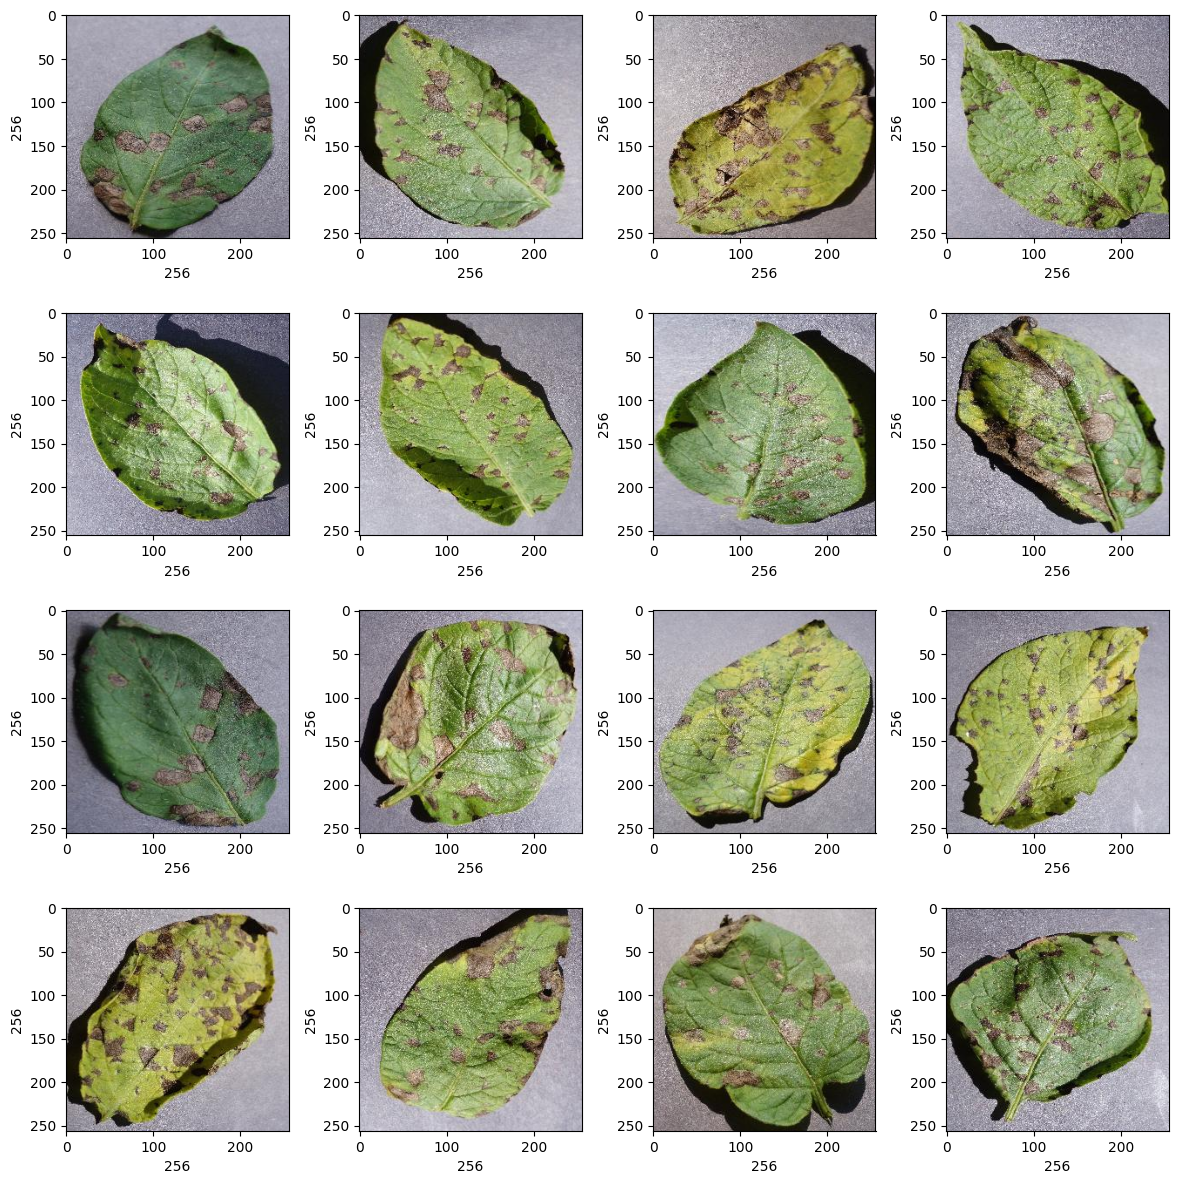

In [6]:
 plt.figure(figsize = (12, 12))
 dataset_path = "Potato___Early_blight"
 for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
  plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

In [13]:
# Converting Images to array
def convert_image_to_array(image_dir):
  try:
      image = cv2.imread(image_dir)
      if image is not None :
          image = cv2.resize(image, (256, 256))
          return img_to_array(image)
      else :
          return np.array([])
  except Exception as e:
      print(f"Error : {e}")
      return None
  dataset_path = "Potato___Early_blight"
  labels = os.listdir(dataset_path)

In [20]:
import os

dataset_path = "Potato___Early_blight"
image_list, label_list = [], []
all_labels = ['Potato-Early_blight']
binary_label = 1  # Single label for all images

for file in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, file)

    # Ensure it's a file (not a directory)
    if os.path.isfile(image_path):
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_label)


In [22]:
 # Visualize the number of classes count
 label_counts = pd.DataFrame(label_list).value_counts()
 label_counts.head()

,count
0,
1,300


In [23]:
image_list[0].shape

(256, 256, 3)

In [25]:
label_list = np.array(label_list)
label_list.shape

(300,)

In [26]:
 x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image p
 x_train = np.array(x_train, dtype=np.float16) / 225.0
 x_test = np.array(x_test, dtype=np.float16) / 225.0
 x_train = x_train.reshape(-1, 256, 256, 3)
 x_test = x_test.reshape(-1, 256, 256, 3)

In [28]:
#one-hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
 model = Sequential()
 model.add(Conv2D(32, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
 model.add(MaxPooling2D(pool_size = (3, 3)))
 model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
 model.add(MaxPooling2D(pool_size = (2, 2)))
 model.add(Flatten())
 model.add(Dense(8, activation = "relu"))
 model.add(Dense(3, activation = "softmax"))
 model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
 model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])
 # Splitting the training data set into training and validation data sets
 x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)
 # Training the model
 epochs = 10
 batch_size = 128
 history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 3)

In [42]:
#one-hot Encoding
# Since there's only one label 'Potato___Early_blight',
# the target variable should have a single output class.
# No need for to_categorical
y_train = np.array(label_list)
y_test = np.array(label_list)
#... your other code ...
#Change the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))  # Binary classification: 1 output with sigmoid
model.summary()

# Compile the model for binary classification
model.compile(loss='binary_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(image_list, label_list, test_size = 0.2, random_state = 10)

# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image p
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_val = np.array(x_val, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_val = x_val.reshape(-1, 256, 256, 3)
epochs = 2
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))  # Re-train the model after changes

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,329 (903.63 KB)

 Trainable params: 231,329 (903.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step - accuracy: 0.8547 - loss: 0.6323 - val_accuracy: 1.0000 - val_loss: 0.4396
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 1.0000 - loss: 0.3988 - val_accuracy: 1.0000 - val_loss: 0.2148


In [43]:
 model.save("Model\plant_disease_model.h5")

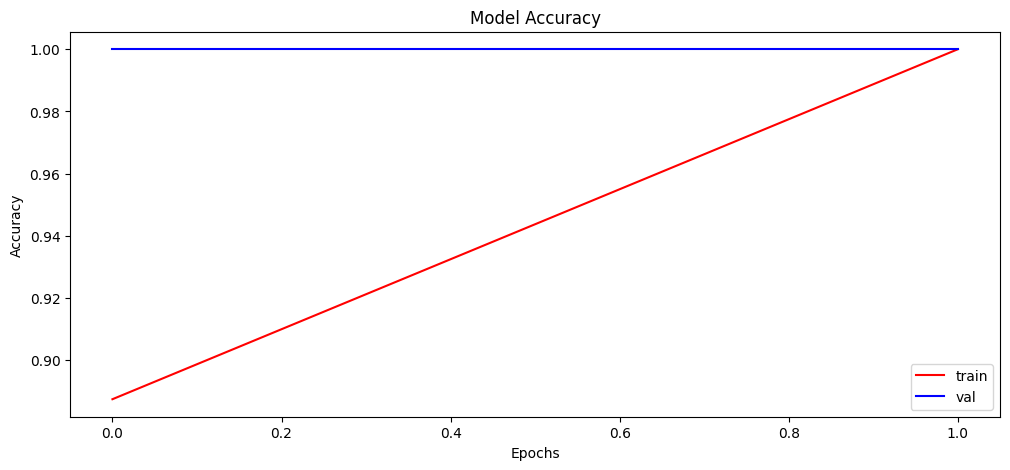

In [44]:
 # Plot the training history
plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [48]:
 # Split the data for training, testing, and validation
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

# Normalize the data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

#Since we have only one label, we don't need to_categorical
y_train = np.array(y_train)
y_test = np.array(y_test)
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.2155
Test Accuracy: 100.0


In [49]:
#Make predictions on testing data
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 880ms/step


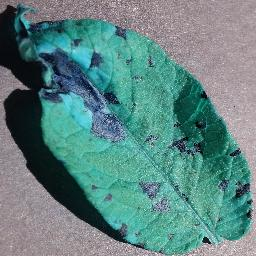

In [50]:
 # Plotting image to compare
 img = array_to_img(x_test[11])
 img

In [51]:
 # Finding max value from predition list and comaparing original value vs predicted
 print("Originally : ", all_labels[np.argmax(y_test[11])])
 print("Predicted : ", all_labels[np.argmax(y_pred[4])])
 print(y_pred[2])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
[0.81776065]


In [52]:
for i in range(50):
 print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [1])])

Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early_blight
Potato-Early_blight   Potato-Early

Okay, here's a simple, cell-by-cell explanation of your `Assign_3.ipynb` (Plant Disease Detection CNN) code:

**Cell 0: Imports**
*   **What it does:** Brings in all the tools needed, like `numpy` for math, `pandas` for data handling, `matplotlib` for plotting, `cv2` (OpenCV) and `PIL` for image processing, and `tensorflow`/`keras` for building the deep learning model (the CNN).

**Cell 1: TensorFlow Version**
*   **What it does:** Prints the version of TensorFlow you are using. Good for checking compatibility.

**Cell 2: Dataset Path**
*   **What it does:** Stores the location (folder path) of your plant disease image dataset on your computer in a variable.

**Cell 3: Show Sample Images**
*   **What it does:** Displays a grid of 16 random sample images from one of the disease folders ('Potato\_\_\_Early\_blight' in this case) just to give you a visual idea of what the data looks like. It also shows the width and height of the image in pixels.

**Cell 4: Image to Array Function & Labels**
*   **What it does:**
    *   Defines a function (`convert_image_to_array`) that takes an image file path, reads the image, resizes it to a standard size (256x256 pixels), and converts it into a format computers understand (a NumPy array of numbers).
    *   Gets the names of the subfolders inside your dataset folder (these are your disease labels like 'Corn-Common\_rust', etc.).

**Cell 5: Load All Images and Create Labels**
*   **What it does:**
    *   Goes through each disease subfolder in your dataset path.
    *   For every image file in each subfolder:
        *   It uses the function from Cell 4 to read, resize, and convert the image into a number array. These arrays are added to `image_list`.
        *   It assigns a number label (0, 1, or 2) based on which subfolder the image came from. These labels are added to `label_list`. (So, all 'Corn-Common\_rust' images might get label 0, 'Potato-Early\_blight' get 1, etc.).

**Cell 6: Check Label Counts**
*   **What it does:** Counts how many images you have for each disease category (label) to see if the dataset is balanced.

**Cell 7: Check Image Shape**
*   **What it does:** Shows the dimensions (height, width, color channels) of the first image array in your list. Confirms it's 256x256 pixels with 3 color channels (RGB).

**Cell 8: Check Label Shape**
*   **What it does:** Shows how many labels you have collected (should match the total number of images).

**Cell 9: Train/Test Split and Normalization**
*   **What it does:**
    *   `train_test_split`: Splits your images (`image_list`) and labels (`label_list`) into a training set (80%, for teaching the model) and a testing set (20%, for checking how well it learned).
    *   `/ 225.0`: **Normalizes** the pixel values in the images. Pixel values are usually 0-255. Dividing by 255 (it should be 255.0, 225.0 seems like a typo) scales them down to a range between 0 and 1. This helps the model learn better.
    *   `reshape`: Makes sure the image data has the correct 4D shape that the CNN layers expect (number_of_images, height, width, color_channels).

**Cell 10: One-Hot Encoding**
*   **What it does:** Converts the number labels (0, 1, 2) into a "one-hot" format.
    *   Example:
        *   0 becomes `[1, 0, 0]`
        *   1 becomes `[0, 1, 0]`
        *   2 becomes `[0, 0, 1]`
    *   This format is often required for training classification models with multiple categories when using `categorical_crossentropy` loss.

**Cell 11: Build the CNN Model**
*   **What it does:** Defines the layers of your Convolutional Neural Network (CNN).
    *   `Sequential()`: Creates a model where layers are stacked one after another.
    *   `Conv2D`: **Convolutional layers**. These are the core of the CNN. They use filters to scan the image and learn to detect features (edges, textures, shapes).
    *   `MaxPooling2D`: **Pooling layers**. These shrink the size of the feature maps from the Conv2D layers, making the model more efficient and robust.
    *   `Flatten`: Converts the 2D feature maps into a 1D list so they can be fed into standard `Dense` layers.
    *   `Dense`: Regular ("fully connected") layers used for the final classification decision. The last `Dense(3, activation="softmax")` layer has 3 outputs (one for each disease class) and uses `softmax` to give probabilities for each class.
    *   `model.summary()`: Prints a summary of the model's layers and parameters.

**Cell 12: Compile and Train the Model**
*   **What it does:**
    *   `model.compile()`: Configures the model for training. Sets the `loss` function (how errors are measured - `categorical_crossentropy` for one-hot labels), the `optimizer` (how the model updates itself to reduce errors - `Adam` is a good choice), and `metrics` (what to track - `accuracy`).
    *   `train_test_split`: Splits the *training* data further into a smaller training set and a validation set (used during training to check performance on data the model isn't directly learning from).
    *   `model.fit()`: Starts the actual training process using the training data (`x_train`, `y_train`) and checks performance against the validation data (`x_val`, `y_val`) after each `epoch` (pass through the data). It runs for 50 epochs with a batch size of 128 images per update.

**Cell 13: Save the Model**
*   **What it does:** Saves the trained model (its architecture and learned weights) to a file (`plant_disease_model.h5`) so you can load and use it later without retraining.

**Cell 14: Plot Training Accuracy**
*   **What it does:** Shows a graph of how the model's accuracy on the training data and validation data improved over the 50 epochs. Helps to see if the model learned well and didn't overfit too much.

**Cell 15: Evaluate on Test Set**
*   **What it does:** Tests the final trained model on the completely unseen test data (`x_test`, `y_test`) and prints the final test accuracy (how often it got the disease category right).

**Cell 16: Make Predictions**
*   **What it does:** Uses the trained model to predict the disease category for all images in the test set (`x_test`).

**Cell 17: Show a Test Image**
*   **What it does:** Picks one specific image from the test set (the 12th one, index 11) and displays it.

**Cell 18: Compare Prediction vs Actual**
*   **What it does:**
    *   Looks at the prediction the model made for the image shown in Cell 17 (and another one, index 4).
    *   Finds the category with the highest predicted probability (`np.argmax(y_pred[...])`).
    *   Compares the predicted disease name with the actual disease name (`np.argmax(y_test[...])`) for that image.
    *   Also prints the raw probability scores for one prediction.

**Cell 19: Compare More Predictions**
*   **What it does:** Loops through the first 50 images in the test set and prints the actual disease name alongside the predicted disease name (it seems to always print the prediction for index 1, `y_pred[1]`, which might be a small mistake - it should likely be `y_pred[i]`). This gives a quick look at more examples of the model's performance.

**Cell 20: Empty Cell**
*   **What it does:** Nothing, it's an empty code cell.